In [18]:
import numpy as np
import pandas as pd
import json
import sklearn as sk
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
def confusion_matrix(data, prompt):
    data = data[data["PromptType"]==prompt]
    return np.array([[len(data[data["model_bruteforce"]=="1"][data["human_bruteforce"]=="1"]), len(data[data["model_bruteforce"]=="1"][data["human_bruteforce"]=="0"])], [len(data[data["model_bruteforce"]=="0"][data["human_bruteforce"]=="1"]), len(data[data["model_bruteforce"]=="0"][data["human_bruteforce"]=="0"])]])

def correctness(data, prompt):
    data = data[data["PromptType"]==prompt]
    return len(data[data["correctness"]=="1"]) / len(data)

In [4]:
data = {}
models = ['FinalMath-DSChat', 'FinalMath-DSReason', 'FinalMath-GeminiFlash', 'FinalMath-o3', 'FinalMath-Qwen1', 'FinalMath-Qwen14', 'FinalMath-Qwen70']

for model in models:
    file_path = f"response_evaluation/Math/{model}/resultsEvaluations_evaluatedbyo3-2025-04-16.jsonl"
    with open(file_path, 'r') as file:
        data[model] = [json.loads(line) for line in file]
    
    prompts = pd.DataFrame(data[model])["PromptType"].unique()
    
    print(model)
    for prompt in prompts:
        print(prompt, ":", confusion_matrix(pd.DataFrame(data[model]), prompt))

    print("Correctness:", correctness(pd.DataFrame(data[model]), prompt))


FinalMath-DSChat
basicprompt : [[ 27  76]
 [  9 138]]
mathPrompt : [[ 26  69]
 [ 13 142]]
hint_prompt : [[ 25  69]
 [  9 147]]
explicit_symbol_reasoning_prompt : [[ 29  74]
 [  6 141]]
implicit_symbol_reasoning_prompt : [[ 31  74]
 [ 10 133]]
Correctness: 0.5564516129032258
FinalMath-DSReason
basicprompt : [[ 23  29]
 [ 16 182]]
Correctness: 0.672
FinalMath-GeminiFlash
basicprompt : [[ 22  43]
 [ 12 168]]
mathPrompt : [[ 19  41]
 [ 11 173]]
hint_prompt : [[ 17  29]
 [ 17 180]]
explicit_symbol_reasoning_prompt : [[ 16  36]
 [ 12 173]]
implicit_symbol_reasoning_prompt : [[ 17  45]
 [ 15 167]]
Correctness: 0.6516393442622951
FinalMath-o3
basicprompt : [[ 18  24]
 [ 18 186]]
mathPrompt : [[ 12  11]
 [ 26 199]]
hint_prompt : [[ 13  23]
 [ 22 181]]
Correctness: 0.803347280334728
FinalMath-Qwen1
basicprompt : [[ 27  67]
 [ 12 144]]
mathPrompt : [[ 23  75]
 [ 13 139]]
hint_prompt : [[ 17  67]
 [ 17 149]]
explicit_symbol_reasoning_prompt : [[ 23  83]
 [ 10 134]]
implicit_symbol_reasoning_prompt

Correctness for FinalMath-DSChat on basicprompt: 0.58
Correctness for FinalMath-DSChat on mathPrompt: 0.536
Correctness for FinalMath-DSChat on hint_prompt: 0.568
Correctness for FinalMath-DSChat on explicit_symbol_reasoning_prompt: 0.536
Correctness for FinalMath-DSChat on implicit_symbol_reasoning_prompt: 0.5564516129032258
Correctness for FinalMath-DSReason on basicprompt: 0.672
Correctness for FinalMath-GeminiFlash on basicprompt: 0.6653061224489796
Correctness for FinalMath-GeminiFlash on mathPrompt: 0.6762295081967213
Correctness for FinalMath-GeminiFlash on hint_prompt: 0.7160493827160493
Correctness for FinalMath-GeminiFlash on explicit_symbol_reasoning_prompt: 0.7088607594936709
Correctness for FinalMath-GeminiFlash on implicit_symbol_reasoning_prompt: 0.6516393442622951
Correctness for FinalMath-o3 on basicprompt: 0.8089430894308943
Correctness for FinalMath-o3 on mathPrompt: 0.7983870967741935
Correctness for FinalMath-o3 on hint_prompt: 0.803347280334728
Correctness for Fin

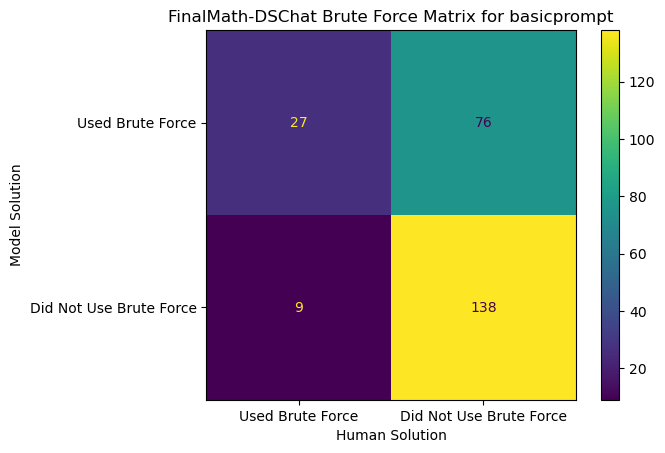

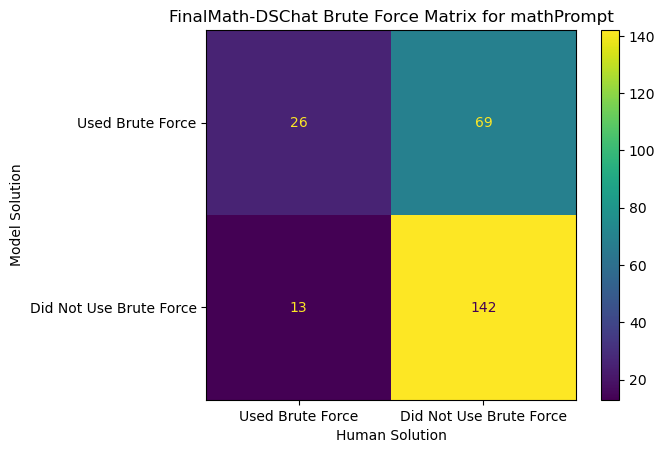

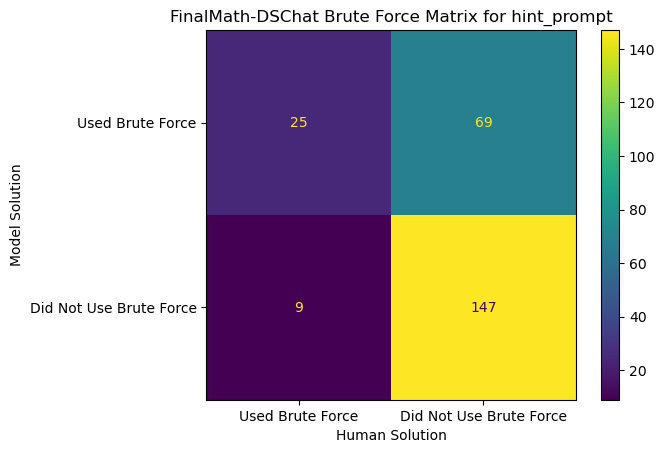

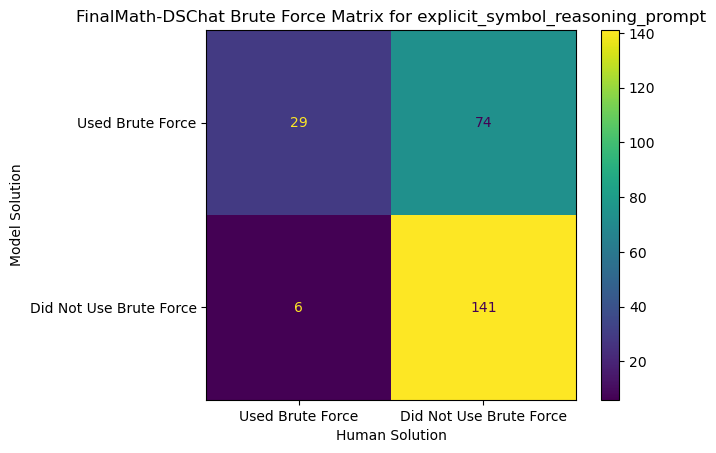

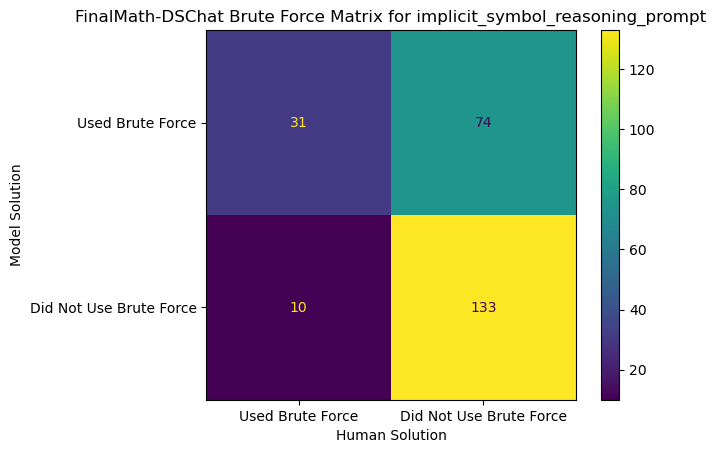

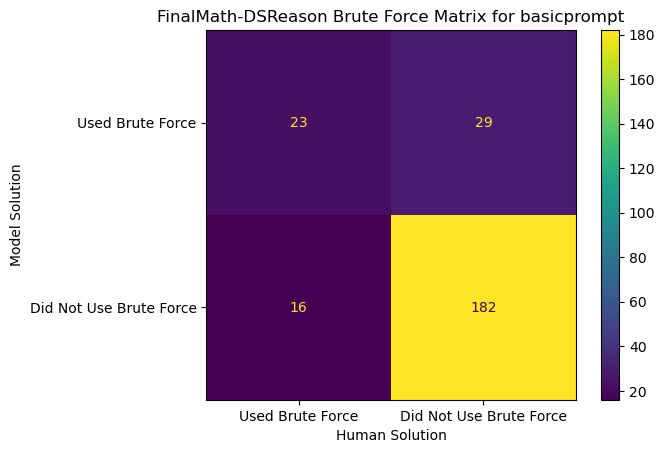

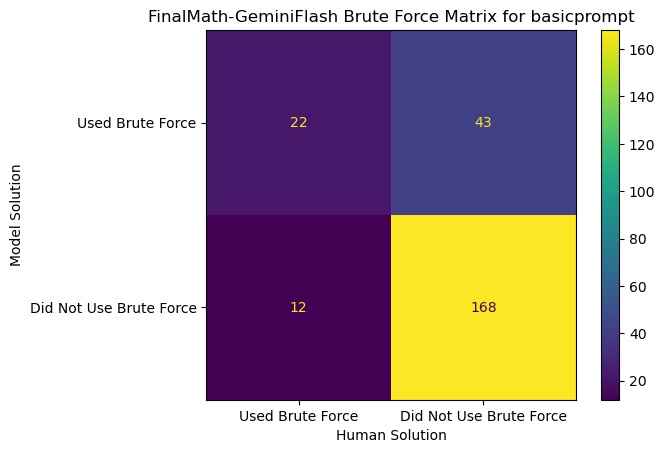

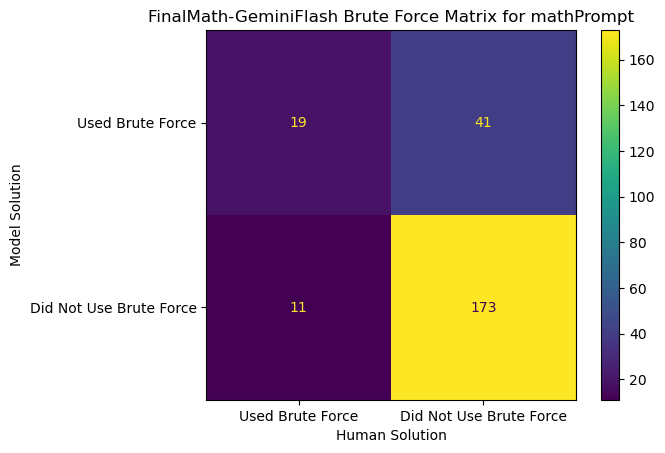

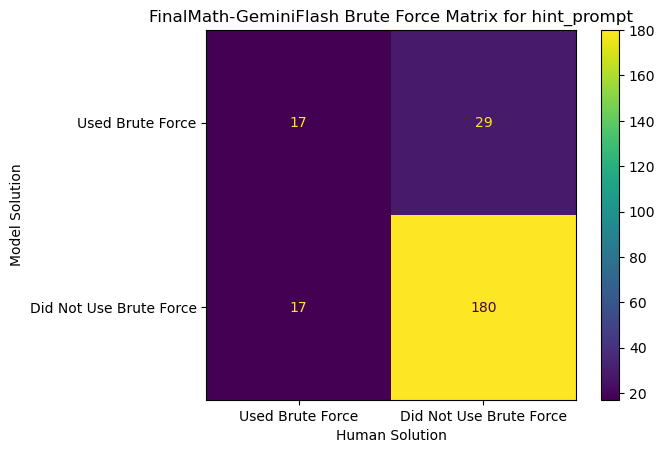

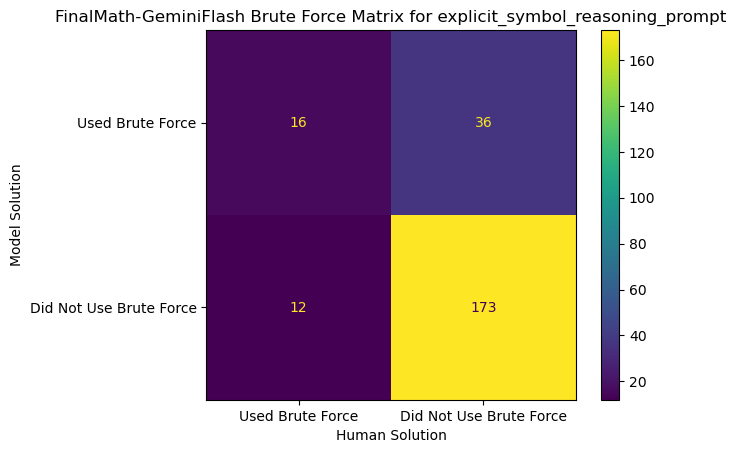

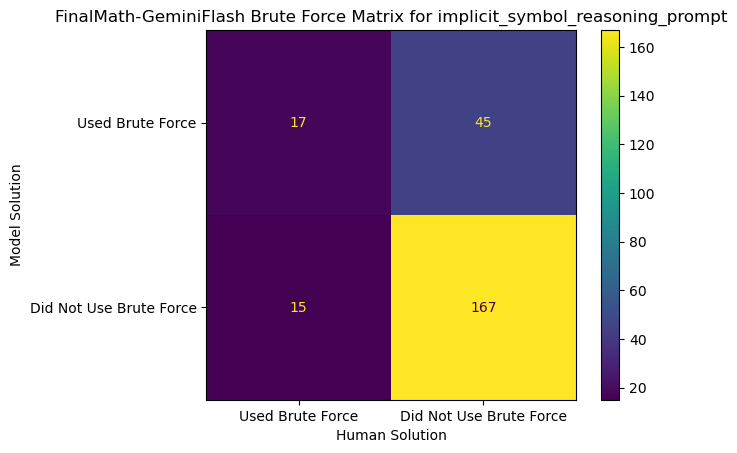

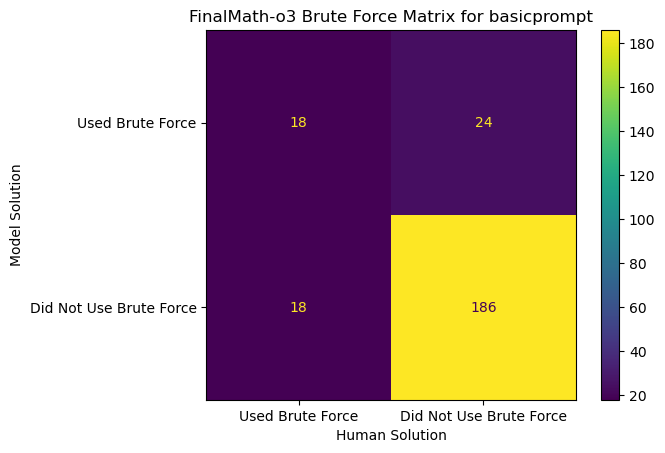

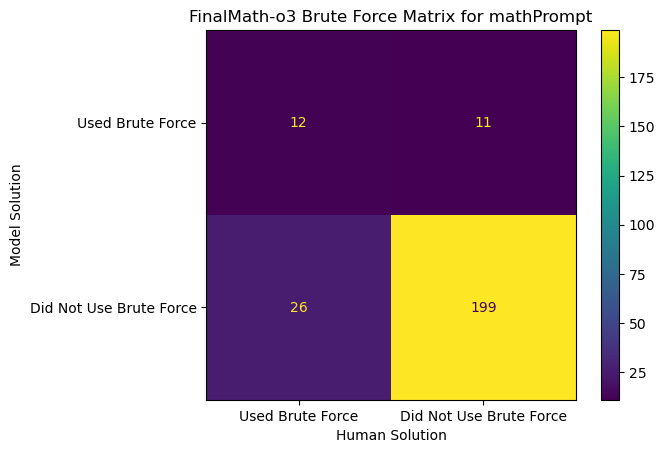

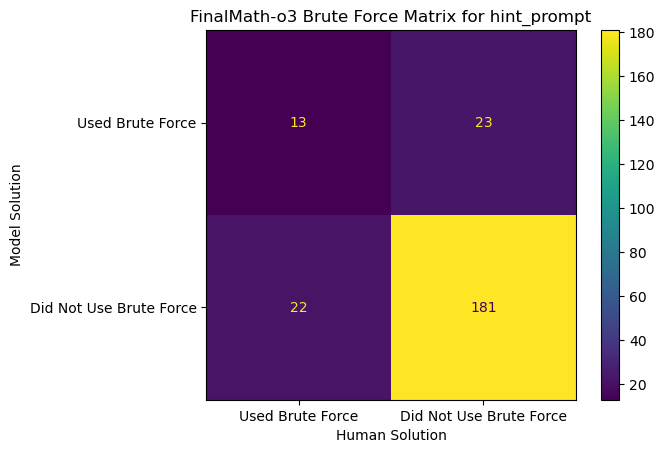

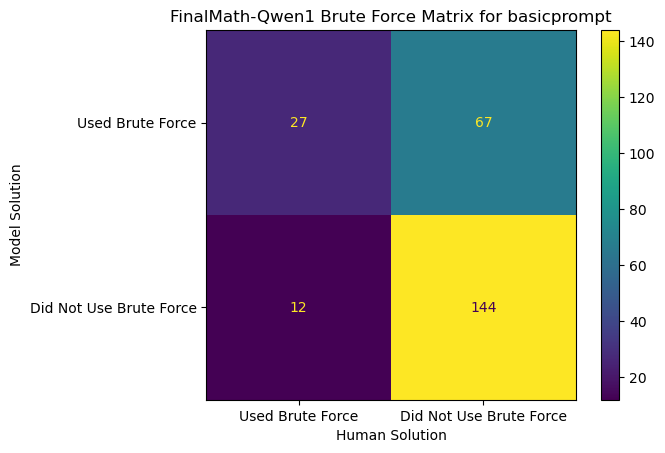

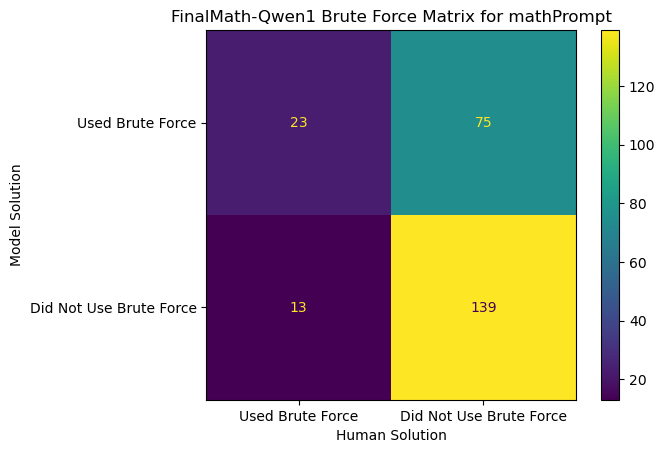

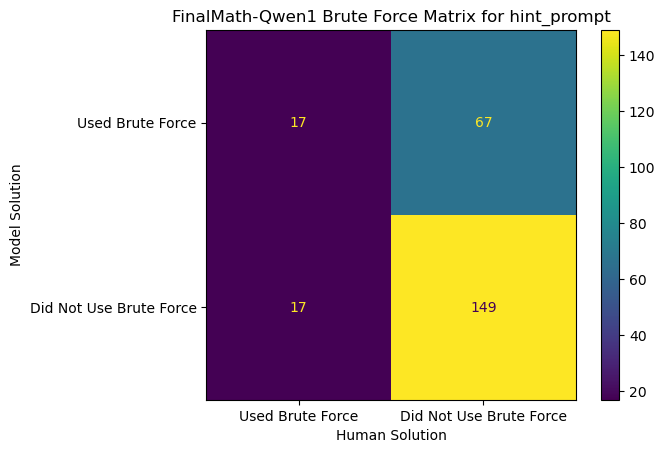

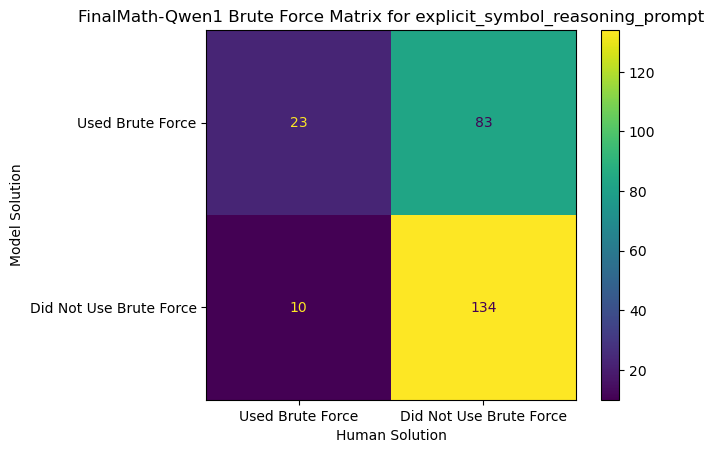

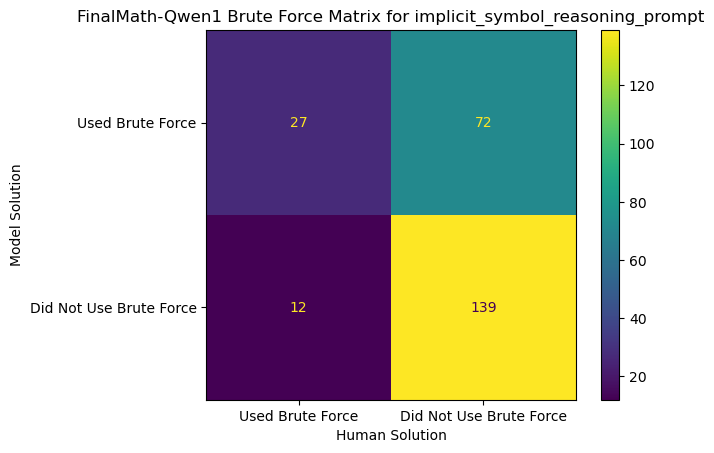

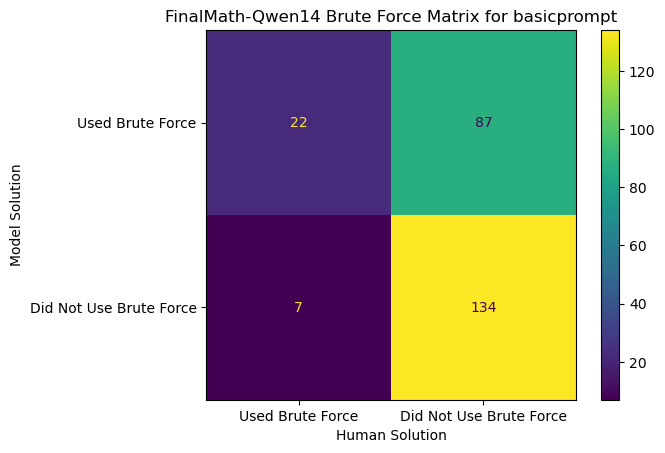

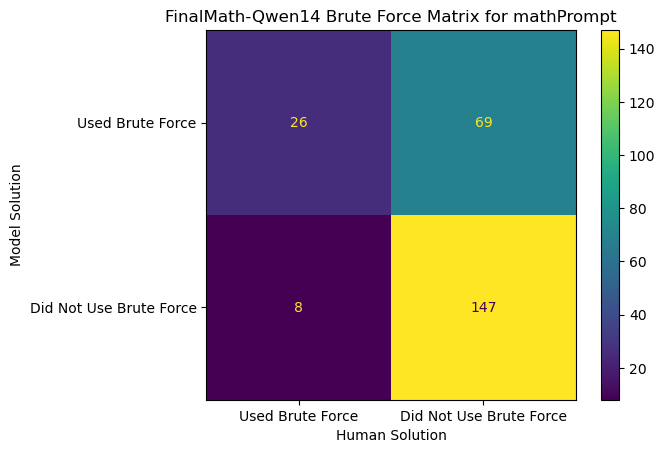

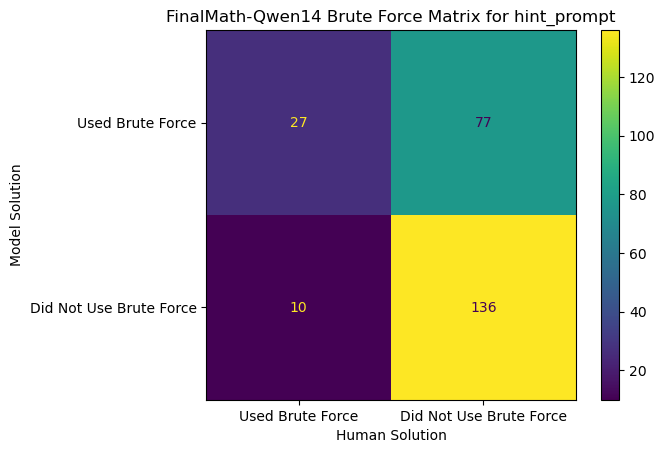

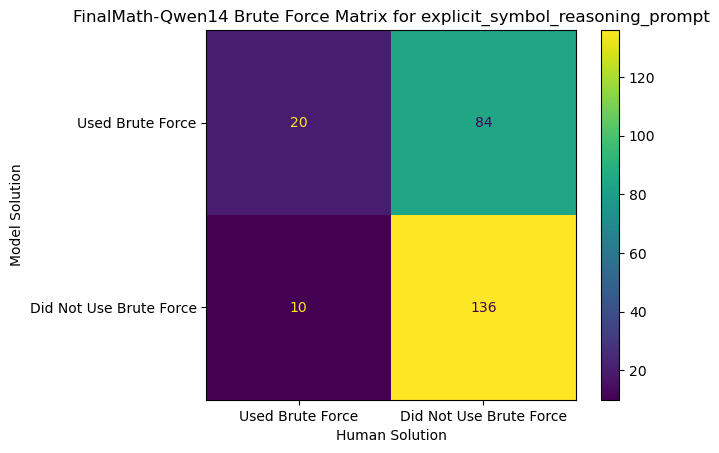

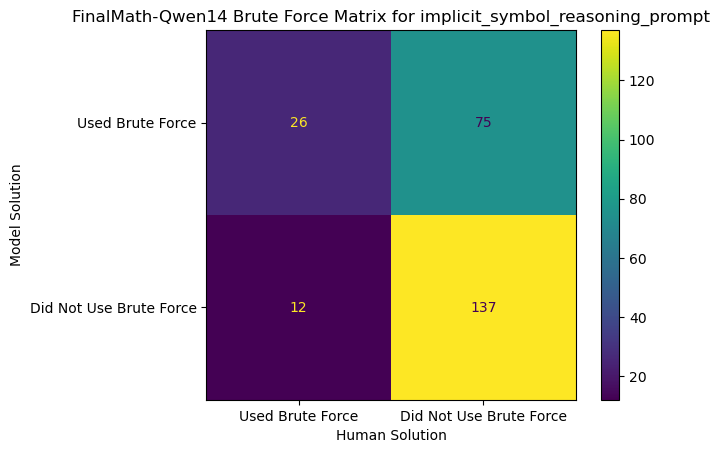

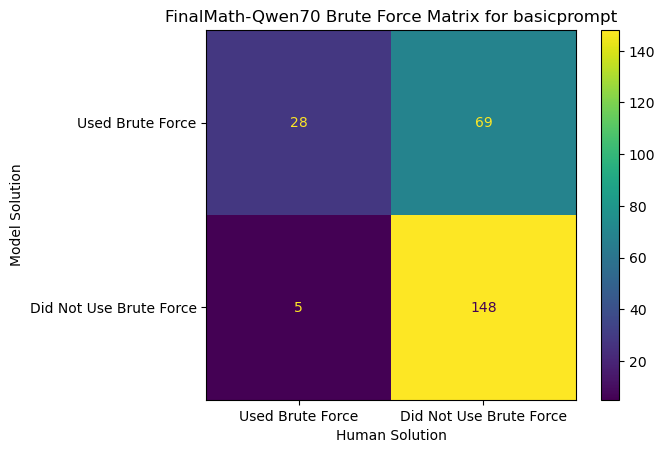

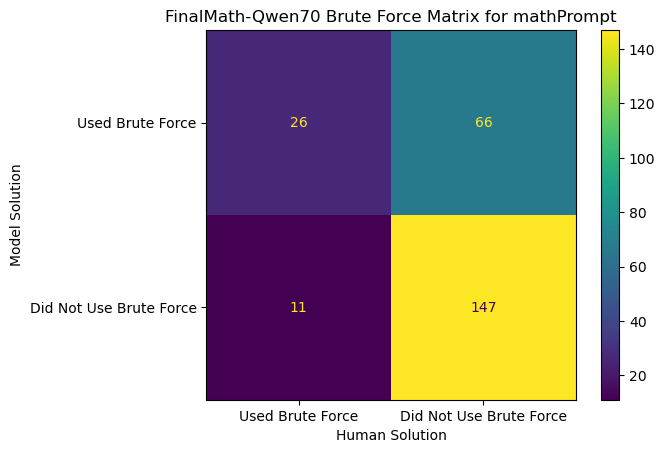

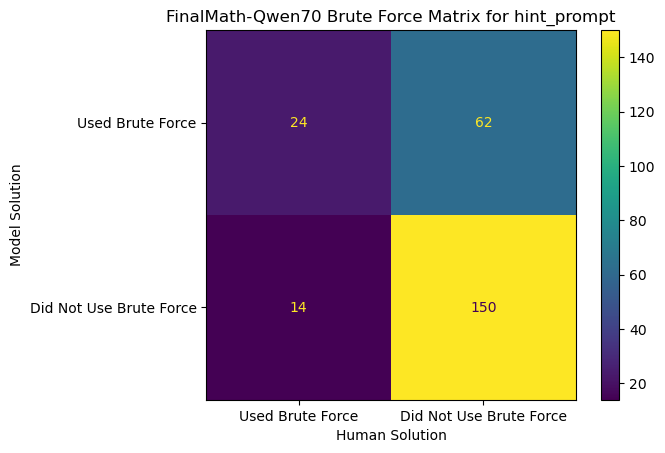

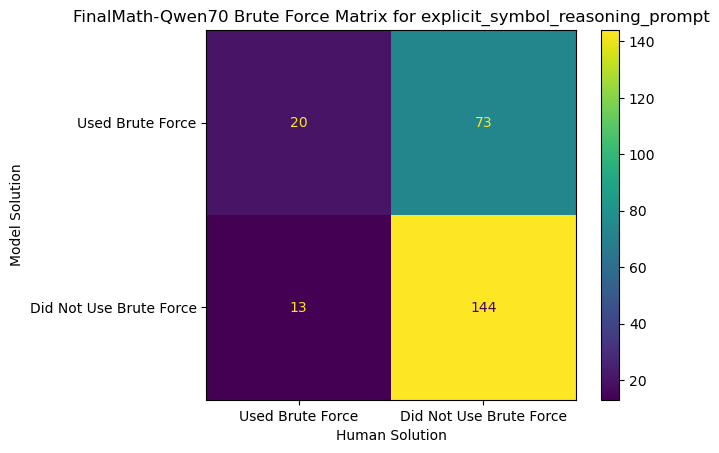

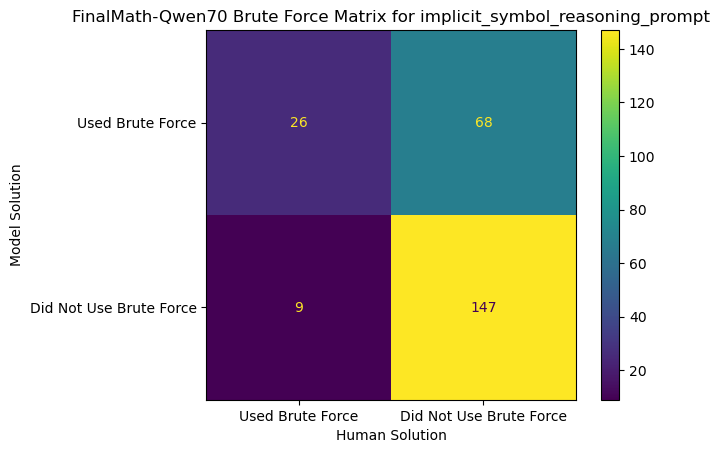

In [24]:
fulldata = pd.DataFrame()
for dataset in data.keys():
    fulldata = pd.DataFrame(data[dataset])
    prompts = fulldata["PromptType"].unique()
    
    # fig, axes = plt.pyplot.subplots(1, len(prompts), figsize=(30, 6))
    for i in range(len(prompts)):
        prompt = prompts[i]
        cmd = sk.metrics.ConfusionMatrixDisplay(confusion_matrix(fulldata, prompt), display_labels=["Used Brute Force", "Did Not Use Brute Force"])
        cmd.plot()
        cmd.ax_.set(xlabel='Human Solution', ylabel='Model Solution')
        cmd.ax_.set_title(f'{dataset} Brute Force Matrix for {prompt}')
    
        print(f"Correctness for {dataset} on {prompt}:", correctness(fulldata, prompt))

In [ ]:
fig, axes = plt.pyplot.subplots(1, 5, figsize=(30, 6))
for i in range(len(prompts)):
    prompt = prompts[i]
    cmd = sk.metrics.ConfusionMatrixDisplay(confusion_matrix(fulldata, prompt), display_labels=["Used Brute Force", "Did Not Use Brute Force"])
    cmd.plot()
    cmd.ax_.set(xlabel='Human Solution', ylabel='Model Solution')
    cmd.ax_.set_title(f'Brute Force Matrix for {prompt}')

In [ ]:
tempdata = fulldata[fulldata["PromptType"] == "basicprompt"]
# print(tempdata.head())
len(tempdata[tempdata["model_bruteforce"]=="1"][tempdata["human_bruteforce"]=="0"])